#### Cody Kaminski
#### Professor Binowski
#### Project 3: Webscraped Data Analysis
#### The purpose of this project is to scrape websites for data and make conclusions based on the scraped data

#### Importing requests library, BeauitfulSoup library, pandas library, and seaborn library

In [203]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns

#### Reading in pages and finding pages

In [204]:
BASE_URL_1 = "https://www.sherdog.com/news/rankings/"
BASE_URL_2 = "/Sherdogs-Official-Mixed-Martial-Arts-Rankings-188506"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

rankingURLs = []
fighterURLs = []

for num in range(2, 15):
    rankingURLs.append(f"{BASE_URL_1}{num}{BASE_URL_2}")

for rankingURL in rankingURLs:
    RESPONSE = requests.get(rankingURL, headers = headers)
    STATUS = RESPONSE.status_code
    
    if STATUS == 200:
        PAGE = RESPONSE.text
        SOUP = bs(PAGE)
        
        for h2 in SOUP.find_all("h2")[2:12]:
            fighterURL = "https://www.sherdog.com"+str(h2.find("a", href = True)["href"])
            
            fighterURLs.append(fighterURL)

#### Reading in pages and compiling data

In [205]:
fighterList = []

for fighterURL in fighterURLs:
    RESPONSE = requests.get(fighterURL, headers = headers)
    STATUS = RESPONSE.status_code
    
    if STATUS == 200:
        PAGE = RESPONSE.text
        SOUP = bs(PAGE)
        
        fighterStats = {}
        
        name = str(SOUP.find_all("h1", itemprop = "name")[0].find("span").text)
        wins = int(SOUP.find("div", class_ = "winloses win").find_all("span")[1].text)
        losses = int(SOUP.find("div", class_ = "winloses lose").find_all("span")[1].text)
        nationality = str(SOUP.find("strong", itemprop = "nationality").text)
        association = str(SOUP.find("span", itemprop = "name").text)
        age = SOUP.find("div", class_ = "bio-holder").find("table").find_all("tr")[0].find_all("td")[1].find("b").text
        
        try:
            age = int(age)
        except ValueError:
            age = None
            
        fighterStats["name"] = name
        fighterStats["wins"] = wins
        fighterStats["losses"] = losses
        fighterStats["nationality"] = nationality
        fighterStats["association"] = association
        fighterStats["age"] = age

        fighterList.append(fighterStats)
        
fighterDataFrame = pd.DataFrame(fighterList)

fighterDataFrame["win_loss_ratio"] = fighterDataFrame["wins"]/fighterDataFrame["losses"]

#### Compiled dataframe from scraped data

In [206]:
fighterDataFrame

,name,wins,losses,nationality,association,age,win_loss_ratio
0,Francis Ngannou,17,3,France,Xtreme Couture,36.0,5.666667
1,Ciryl Gane,11,1,France,MMA Factory,32.0,11.000000
2,Tai Tuivasa,14,4,Australia,Lions High Performance Centre,29.0,3.500000
3,Sergei Pavlovich,16,1,Russia,Eagles MMA,30.0,16.000000
4,Derrick Lewis,26,10,United States,Main Street Boxing & Muay Thai,37.0,2.600000
...,...,...,...,...,...,...,...
125,Saori Oshima,10,3,Japan,AACC,28.0,3.333333
126,Jessica Correa Delboni,12,4,Brazil,Parana Vale Tudo,29.0,3.000000
127,Alesha Zappitella,9,4,United States,Scorpion Fighting System,27.0,2.250000
128,Rena Kubota,13,4,Japan,Caesar Gym,31.0,3.250000


#### Organization of data for graphing

In [181]:
associationDictionary = {}

for fighter in fighterList:
    if fighter["association"] in associationDictionary:
        associationDictionary[fighter["association"]] = associationDictionary[fighter["association"]] + 1
    else:
        associationDictionary[fighter["association"]] = 1
        
tempAssociationDictionary = {}        
        
for key, value in associationDictionary.items():
    if value > 2:
        tempAssociationDictionary[key] = value
        
associationDictionary = tempAssociationDictionary

associationDataFrame = pd.DataFrame(associationDictionary.items(), columns = ["Association", "Count"])

#### Are there associations that multiple MMA fighters belong to?

[Text(0.5, 1.0, "8 top 10 fighters from MMA's most populous weight classes belong to American Top Team")]

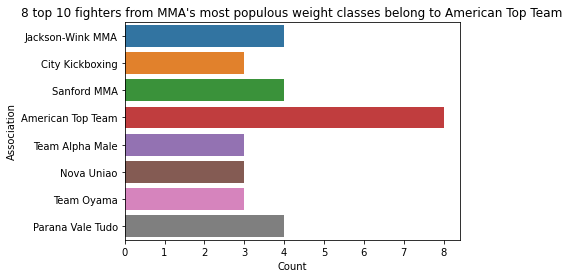

In [183]:
sns.barplot(x = "Count", y = "Association", data = associationDataFrame).set(title = "8 top 10 fighters from MMA's most populous weight classes belong to American Top Team")

#### Organization of data for graphing

In [190]:
nationalityDictionary = {}

for fighter in fighterList:
    if fighter["nationality"] in nationalityDictionary:
        nationalityDictionary[fighter["nationality"]] = nationalityDictionary[fighter["nationality"]] + 1
    else:
        nationalityDictionary[fighter["nationality"]] = 1
        
tempNationalityDictionary = {}        
        
for key, value in nationalityDictionary.items():
    tempNationalityDictionary[key] = value
        
nationalityDictionary = tempNationalityDictionary

nationalityDataFrame = pd.DataFrame(nationalityDictionary.items(), columns = ["Nationality", "Count"])

#### Are there countries that account for a majority of MMA fighters?

[Text(0.5, 1.0, 'The United States and Brazil account for the majority of the top 10 fighters in the most populous weight classes in MMA')]

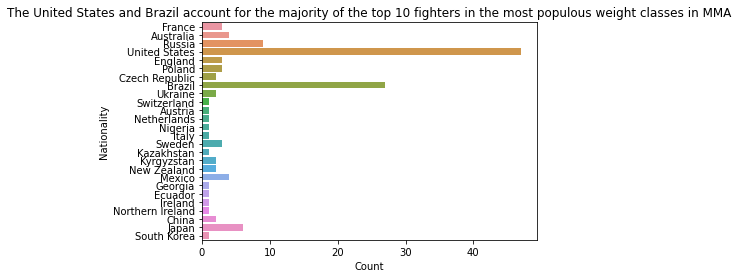

In [192]:
sns.barplot(x = "Count", y = "Nationality", data = nationalityDataFrame).set(title = "The United States and Brazil account for the majority of the top 10 fighters in the most populous weight classes in MMA")

#### Calculation of data

In [196]:
count = 0
total = 0

for fighter in fighterList:
    count = count + 1
    
    if type(fighter["age"]) == int or type(fighter["age"]) == float:
        total = total + fighter["age"]
        
averageAge = total/count

#### What is the average age of MMA fighters?

In [197]:
averageAge

32.323076923076925

#### Calculation of data

In [201]:
count = 0
total = 0
for fighter in fighterList:
    count = count + 1
    
    losses = fighter["losses"]
    
    if losses == 0:
        losses = 1
    
    total = total + fighter["wins"]/losses
    
averageWinLossRatio = total/count

#### What is the average ratio of wins to losses among MMA fighters?

In [202]:
averageWinLossRatio

6.105555555555555